# STA130 LEC Week 11 (Nov 18)

## Binary Classification Binary Decison Trees and Machine Learning

*Didn't get to the code at the end of the last lecture, but that was a complex demonstration so let's just restart.*

0. **Logistic Regression** 

    1. Makes **probability predictions** for **binary outcomes**
    2. The **train-test** versus **statistical hypothesis testing and inference**
    3. **Model Complexity** is number of **predictor variables** (and **interactions**)
    4. **Generalization** versus **Overfitting**


1. **Machine Learning** and **Regularization**

    1. **Binary Classification Binary Decison Trees** 
        1. **Regularization Tuning Parameters** (or, technically, **stopping parameters**)
        2. Decison Tree Construction AKA **Model Fitting**  
        3. What are **Decison Trees**?
            1. **Interactions**
            2. **Feature Space** _partitions_
            3. **Feature Importance**
            4. **Partial Dependency Plots**

    2. **Random Forests** (of **Bootstrapped Decision Trees**)


2. **Prediction**, **thresholding**, and different **Metrics**


3. **Self Evaluation \#1: what's the correlation of your understanding versus the true of the following items?<br>AKA what's your 0%-100% (or, techically -100%-100%) understanding level for the following topics?**
    1. Bootstrapped Confidence Intervals
    2. "Coin Flippling" sampling distribution hypothesis testing for "paired samples"
    3. Calculating p-values based on observed statistics and "sampling distributions under the null"
    4. Correlation
    5. The normal "Simple Linear Regression" model
    6. Fitting Simple Linear Regression models
    7. Making predictions from linear models
    8. Using Simple Linear Regression to evaluate the evidence of association between two continue variables
    9. Assessming the assumptions of Simple Linear Regression using residuals
    10. Hypothesis testing for two unpaired samples using a permutation test (as opposed to hypothesis testing based on differences for "paired samples")
    11. Hypothesis testing for two groups (unpaired samples) using indicator variables in Simple Linear Regression
    12. "Double" bootstrap confidence intervals estimating difference parameters for two groups (unpaired samples)


4. **Self Evaluation \#2: what's the correlation of your understanding versus the true of the following items?<br>AKA what's your 0%-100% (or, techically -100%-100%) understanding level for the following topics?**

    1. Multiple Linear Regression versus Simple Linear Regression
    2. Binary indicator variables
    3. Categorical variables
    4. Interactions
    5. Multicollinearity versus Statistical Inference
    6. Multicollinearity versus Prediction
    7. Logistic Regression
    8. Classification veresus Regression
    9. Machine Learning versus Statistical Inference
    10. Classification Decision Trees versus Multiple Linear Regression
    11. Classification Decision Trees versus Logistic Regression
    12. Model Complexity and Overfitting
    13. Model Complexity and Regularization Tuning Parameters
    
    
5. **Student Lecture Summary**

    


## 0. Restarting _Logistic Regression_ with _this new data set_

In [1]:
import pandas as pd 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = ["age", "workclass", "fnlwgt", "education", "education-num", 
                "marital-status", "occupation", "relationship", "race", "sex", 
                "capital-gain", "capital-loss", "hours-per-week", "native-country", 
                "income"]
data_raw = pd.read_csv(url, names=column_names, skipinitialspace=True)
data_use = data_raw.copy()
#data_use = data_use.drop(columns=['workclass', 'marital-status', 'occupation', 
#                                  'capital-gain', 'capital-loss', 'hours-per-week', 
#                                  'native-country', 'education-num', 'fnlwgt'])
display(data_use.head(), data_use.shape)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

(32561, 15)

In [2]:
data_use.income.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [3]:
data_use.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [4]:
data_use.loc[data_use.education == 'Preschool', 'education'] = "<=6th"
data_use.loc[data_use.education == '1st-4th', 'education'] = "<=6th"
data_use.loc[data_use.education == '5th-6th', 'education'] = "<=6th"
data_use.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
<=6th             552
9th               514
12th              433
Doctorate         413
Name: count, dtype: int64

In [5]:
data_use.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [6]:
data_use.loc[data_use.workclass == 'Without-pay', 'workclass'] = "?"
data_use.loc[data_use.workclass == 'Never-worked', 'workclass'] = "?"
data_use.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: count, dtype: int64

In [7]:
data_use.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [8]:
data_use.loc[data_use.occupation == 'Armed-Forces', 'occupation'] = "?"
data_use.occupation.value_counts()


occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1852
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Name: count, dtype: int64

In [13]:
data_use['workclass-occupation'] = data_use.workclass + " " + data_use.occupation
data_use['workclass-occupation'].value_counts()
for i,k in zip(data_use['workclass-occupation'].value_counts().index,data_use['workclass-occupation'].value_counts().values):
   print(i, k)

Private Craft-repair 3195
Private Sales 2942
Private Adm-clerical 2833
Private Other-service 2740
Private Exec-managerial 2691
Private Prof-specialty 2313
Private Machine-op-inspct 1913
? ? 1843
Private Handlers-cleaners 1273
Private Transport-moving 1266
Private Tech-support 736
Local-gov Prof-specialty 705
Self-emp-not-inc Craft-repair 531
Private Farming-fishing 455
Self-emp-not-inc Farming-fishing 430
State-gov Prof-specialty 414
Self-emp-inc Exec-managerial 400
Self-emp-not-inc Exec-managerial 392
Self-emp-not-inc Sales 385
Self-emp-not-inc Prof-specialty 373
Federal-gov Adm-clerical 317
Local-gov Protective-serv 304
Self-emp-inc Sales 291
Local-gov Adm-clerical 283
State-gov Adm-clerical 253
Local-gov Exec-managerial 214
Local-gov Other-service 193
Private Protective-serv 190
State-gov Exec-managerial 189
Federal-gov Exec-managerial 180
Self-emp-not-inc Other-service 175
Federal-gov Prof-specialty 175
Self-emp-inc Prof-specialty 160
Private Priv-house-serv 149
Local-gov Craft-rep

## 0.2 The _train-test_ versus _statistical hypothesis testing and inference_

In [10]:
from sklearn import model_selection
import numpy as np

np.random.seed(130)
train, test = model_selection.train_test_split(data_use, train_size=0.8)

## 0. Logistic Regression

In [11]:
import statsmodels.formula.api as smf

formula = '''
I((income=='>50K').astype(int)) ~ scale(age) + I(scale(age)**2) + I(scale(age)**3)
                                + C(education, Treatment(reference='HS-grad'))
'''
logreg = smf.logit(formula, data=train)
logreg_fit = logreg.fit()
logreg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.432964
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                  
=============================================================================================
Dep. Variable:     I((income == '>50K').astype(int))   No. Observations:                26048
Model:                                         Logit   Df Residuals:                    26031
Method:                                          MLE   Df Model:                           16
Date:                               Mon, 18 Nov 2024   Pseudo R-squ.:                  0.2146
Time:                                       13:31:06   Log-Likelihood:                -11278.
converged:                                      True   LL-Null:                       -14359.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       -1.3034      0.035    -37.301      0.000      -1.372      -1.235
C(education, Treatment(reference='HS-grad'))[T.10th]            -0.8635      0.157     -5.486      0.000      -1.172      -0.555
C(education, Treatment(reference='HS-grad'))[T.11th]            -0.8512      0.159     -5.363      0.000      -1.162      -0.540
C(education, Treatment(reference='HS-grad'))[T.12th]            -0.2702      0.209     -1.291      0.197      -0.681       0.140
C(education, Treatment(reference='HS-grad'))[T.7th-8th]         -1.2964      0.192     -6.735      0.000      -1.674      -0.919
C(education, Treatment(reference='HS-grad'))[T.9th]             -1.3872      0.239     -5.794      0.000      -1.856      -0.918
C(education, Treatment(reference='HS-grad'))[T.<=6th]           -1.6323      0.251     -6.496      0.000      -2.125      -1.140
C(education, Treatment(reference='HS-grad'))[T.Assoc-acdm]       0.6479      0.088      7.381      0.000       0.476       0.820
C(education, Treatment(reference='HS-grad'))[T.Assoc-voc]        0.6408      0.078      8.244      0.000       0.488       0.793
C(education, Treatment(reference='HS-grad'))[T.Bachelors]        1.4257      0.046     30.967      0.000       1.335       1.516
C(education, Treatment(reference='HS-grad'))[T.Doctorate]        2.4653      0.132     18.619      0.000       2.206       2.725
C(education, Treatment(reference='HS-grad'))[T.Masters]          1.6510      0.064     25.839      0.000       1.526       1.776
C(education, Treatment(reference='HS-grad'))[T.Prof-school]      2.5736      0.114     22.559      0.000       2.350       2.797
C(education, Treatment(reference='HS-grad'))[T.Some-college]     0.4112      0.048      8.643      0.000       0.318       0.504
scale(age)                                                       1.0404      0.029     36.226      0.000       0.984       1.097
I(scale(age) ** 2)                                              -0.8932      0.034    -26.448      0.000      -0.959      -0.827
I(scale(age) ** 3)                                               0.1498      0.012     12.017      0.000       0.125       0.174
================================================================================================================================
"""

## 0.1 Makes _probability predictions_ for _binary outcomes_

In [ ]:
import numpy as np
np.corrcoef((train.income=='>50K'),(logreg_fit.predict(train)>0.5))**2 # this is not R^2
np.corrcoef((train.income=='>50K'),(logreg_fit.predict(train))**2) # correlation of y and $\hat{y}$ is R^2 

In [ ]:
from scipy import stats
stats.spearmanr((train.income=='>50K'),(logreg_fit.predict(train)>0.5))#[0]**2

## 0.2 The _train-test_ versus _statistical hypothesis testing and inference_

In [14]:
# in sample testing
((train.income=='>50K')==(logreg_fit.predict(train)>0.5)).sum()/train.shape[0] 

0.7941108722358723

In [15]:
# out of sample testing
((test.income=='>50K')==(logreg_fit.predict(test)>0.5)).sum()/test.shape[0]

0.7867342238599724

## 0.3 _Model Complexity_ is number of _predictor variables_ (and _interactions_)

In [16]:
train["sex"].value_counts()

sex
Male      17442
Female     8606
Name: count, dtype: int64

In [17]:
train["marital-status"].value_counts()

marital-status
Married-civ-spouse       11985
Never-married             8532
Divorced                  3540
Separated                  833
Widowed                    790
Married-spouse-absent      348
Married-AF-spouse           20
Name: count, dtype: int64

In [18]:
train.relationship.value_counts()

relationship
Husband           10545
Not-in-family      6674
Own-child          4024
Unmarried          2762
Wife               1260
Other-relative      783
Name: count, dtype: int64

In [19]:
train.race.value_counts()

race
White                 22255
Black                  2467
Asian-Pac-Islander      863
Amer-Indian-Eskimo      248
Other                   215
Name: count, dtype: int64

In [20]:
formula = '''
I((income=='>50K').astype(int)) ~ scale(age) + I(scale(age)**2) + I(scale(age)**3)
                                + scale(Q("education-num")) 
                                + C(education, Treatment(reference='HS-grad'))
                                + C(Q("marital-status"), Treatment(reference='Married-civ-spouse')) 
                                + C(relationship, Treatment(reference='Husband'))
                                + C(sex, Treatment(reference='Male')) 
                                + C(race, Treatment(reference='White'))
                                + C(workclass) + C(occupation)
'''
logreg = smf.logit(formula, data=train)
logreg_fit = logreg.fit()
logreg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.344157
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                  
=============================================================================================
Dep. Variable:     I((income == '>50K').astype(int))   No. Observations:                26048
Model:                                         Logit   Df Residuals:                    25995
Method:                                          MLE   Df Model:                           52
Date:                               Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3757
Time:                                       14:18:34   Log-Likelihood:                -8964.6
converged:                                      True   LL-Null:                       -14359.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
==============================================================================================================================================================
                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                     -0.5108      0.544     -0.940      0.347      -1.576       0.555
C(education, Treatment(reference='HS-grad'))[T.10th]                                           1.0552      1.468      0.719      0.472      -1.821       3.932
C(education, Treatment(reference='HS-grad'))[T.11th]                                           0.4801      0.986      0.487      0.626      -1.453       2.413
C(education, Treatment(reference='HS-grad'))[T.12th]                                           0.3962      0.535      0.740      0.459      -0.653       1.445
C(education, Treatment(reference='HS-grad'))[T.7th-8th]                                        1.6833      2.439      0.690      0.490      -3.096       6.463
C(education, Treatment(reference='HS-grad'))[T.9th]                                            1.1730      1.960      0.598      0.550      -2.668       5.014
C(education, Treatment(reference='HS-grad'))[T.<=6th]                                          2.4542      3.077      0.797      0.425      -3.578       8.486
C(education, Treatment(reference='HS-grad'))[T.Assoc-acdm]                                    -1.2464      1.462     -0.853      0.394      -4.112       1.619
C(education, Treatment(reference='HS-grad'))[T.Assoc-voc]                                     -0.6861      0.976     -0.703      0.482      -2.600       1.227
C(education, Treatment(reference='HS-grad'))[T.Bachelors]                                     -1.2390      1.945     -0.637      0.524      -5.052       2.574
C(education, Treatment(reference='HS-grad'))[T.Doctorate]                                     -1.8438      3.407     -0.541      0.588      -8.521       4.833
C(education, Treatment(reference='HS-grad'))[T.Masters]                                       -1.5185      2.432     -0.624      0.532      -6.285       3.248
C(education, Treatment(reference='HS-grad'))[T.Prof-school]                                   -1.2943      2.920     -0.443      0.658      -7.018       4.429
C(education, Treatment(reference='HS-grad'))[T.Some-college]                                  -0.2749      0.489     -0.562      0.574      -1.233       0.684
C(Q("marital-status"), Treatment(reference='Married-civ-spouse'))[T.Divorced]                 -2.3969      0.281     -8.534      0.000      -2.947      -1.846
C(Q("marital-status"), Treatment(reference='Married-civ-spouse'))[T.Married-AF-spouse]         0.6660      0.521      1.278      0.201      -0.355       1.687
C(Q("marital-status"), Treatment(reference='Married-civ-spouse'))[T.Married-spouse-ab

## 0.4 **Generalization** versus **Overfitting**

In [21]:
((train.income=='>50K')==(logreg_fit.predict(train)>0.5)).sum()/train.shape[0]

0.8403716216216216

In [22]:
((test.income=='>50K')==(logreg_fit.predict(test)>0.5)).sum()/test.shape[0]

0.831260555811454

In [23]:
formula = '''
I((income=='>50K').astype(int)) ~ scale(age) * I(scale(age)**2) 
                                * scale(Q("education-num")) 
                                * C(race, Treatment(reference='White'))
                                * C(sex, Treatment(reference='Male')) 
                                + C(education, Treatment(reference='HS-grad'))
                                + C(Q("marital-status"), Treatment(reference='Married-civ-spouse')) 
                                + C(relationship, Treatment(reference='Husband'))
                                + C(workclass) + C(occupation)
'''
logreg = smf.logit(formula, data=train)
logreg_fit = logreg.fit()
logreg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.342364
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Logit Regression Results                                  
=============================================================================================
Dep. Variable:     I((income == '>50K').astype(int))   No. Observations:                26048
Model:                                         Logit   Df Residuals:                    25925
Method:                                          MLE   Df Model:                          122
Date:                               Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3789
Time:                                       14:25:43   Log-Likelihood:                -8917.9
converged:                                      True   LL-Null:                       -14359.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
=====================================================================================================================================================================================================================================
                                                                                                                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                                            -0.4944      0.559     -0.885      0.376      -1.590       0.601
C(race, Treatment(reference='White'))[T.Amer-Indian-Eskimo]                                                                                                          -0.4207      0.385     -1.093      0.275      -1.175       0.334
C(race, Treatment(reference='White'))[T.Asian-Pac-Islander]                                                                                                          -0.4398      0.207     -2.122      0.034      -0.846      -0.034
C(race, Treatment(reference='White'))[T.Black]                                                                                                                       -0.0750      0.133     -0.564      0.573      -0.336       0.186
C(race, Treatment(reference='White'))[T.Other]                                                                                                                       -0.3467      0.511     -0.679      0.497      -1.348       0.655
C(sex, Treatment(reference='Male'))[T.Female]                                                                                                                        -1.0039      0.115     -8.699      0.000      -1.230      -0.778
C(education, Treatment(reference='HS-grad'))[T.10th]                                                                                                                  1.0740      1.509      0.712      0.477      -1.884       4.033
C(education, Treatment(reference='HS-grad'))[T.11th]                                                                                                                  0.5103      1.014      0.503      0.615      -1.476       2.497
C(education, Treatment(reference='HS-grad'))[T.12th]                                                                                                                  0.4261      0.549      0.777      0.437      -0.649       1.502
C(education, Treatment(reference='HS-grad'))[T.7th-8th]                                                                                                               1.7202      2.507      0.686      0.493      -3.194       6.634
C(education, Treatment(reference='HS-grad'))[T.9th]                                                                 

## 0.1 Makes _probability predictions_ for _binary outcomes_
## 0.2 The _train-test_ versus _statistical hypothesis testing and inference_
## 0.3 _Model Complexity_ is number of _predictor variables_ (and _interactions_)
## 0.4 **Generalization** versus **Overfitting**

In [24]:
((train.income=='>50K')==(logreg_fit.predict(train)>0.5)).sum()/train.shape[0]

0.8417536855036855

In [25]:
((test.income=='>50K')==(logreg_fit.predict(test)>0.5)).sum()/test.shape[0]

0.833256563795486

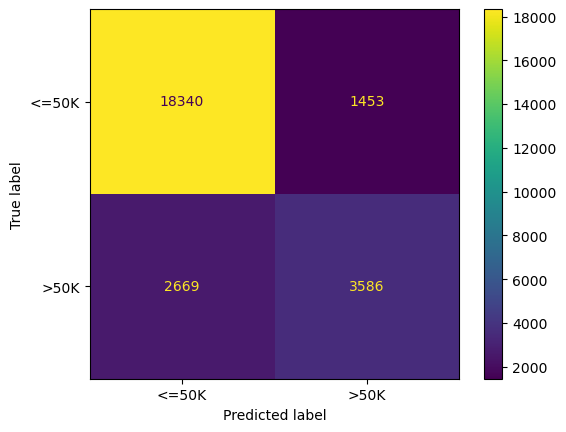

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((train.income=='>50K'), logreg_fit.predict(train)>0.5, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

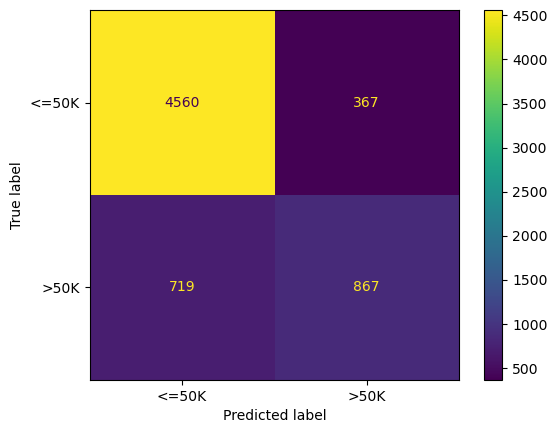

In [27]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), logreg_fit.predict(test)>0.5, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

#### Accuracy
Accuracy measures the proportion of true results (both true positives and true negatives) in the population.
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

#### Specificity (True Negative Rate)
 Specificity measures the proportion of actual negatives that are correctly identified.
$$\text{Specificity} = \frac{TN}{TN + FP}$$

#### Sensitivity (True Positive Rate)
Sensitivity measures the proportion of actual positives that are correctly identified.
$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

#### Precision (Positive Predictive Value)
Precision measures the proportion of positive identifications that were actually correct.
$$\text{Precision} = \frac{TP}{TP + FP}$$

> - **Negative Predictive Value** is the "negative" version of **precision** $\frac{TN}{TN + FN}$
> - **False negative rates (FNR)** are defined to be the proportion of actually positive cases which are incorrectly identified (as false negatives) $TNR = TN/(TN+FP) = 1-FPR$
> - **False positive rates (FPR)** are defined to be the proportion of actually negative cases which are incorrectly identified (as false positives) $TPR = TP/(TP+FN) = 1-FNR$
 


In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
# in sklearn specificity is recall_score(y_true, y_pred, pos_label=0)
# while sensitivity recall_score(y_true, y_pred, pos_label=1) is the default 

print("In sample (training) sensitivity", recall_score(train.income=='>50K', logreg_fit.predict(train)>0.5, pos_label=True))
print("Out of sample (testing) sensitivity", recall_score(test.income=='>50K', logreg_fit.predict(test)>0.5, pos_label=True))
print("In sample (training) specificity", recall_score(train.income=='>50K', logreg_fit.predict(train)>0.5, pos_label=False))
print("Out of sample (testing) specificity", recall_score(test.income=='>50K', logreg_fit.predict(test)>0.5, pos_label=False))
print("In sample (training) precision", precision_score(train.income=='>50K', logreg_fit.predict(train)>0.5))
print("Out of sample (testing) precision", precision_score(test.income=='>50K', logreg_fit.predict(test)>0.5))

In sample (training) sensitivity 0.5733013589128697
Out of sample (testing) sensitivity 0.5466582597730139
In sample (training) specificity 0.9265902086596272
Out of sample (testing) specificity 0.9255124822407145
In sample (training) precision 0.7116491367334788
Out of sample (testing) precision 0.7025931928687196


## 1. Machine Learning and Regularization


In [29]:
X_train = pd.get_dummies(train.iloc[:,:-1]).astype(float)
X_test = X_train[:0].copy()
X_test_tmp = pd.get_dummies(test.iloc[:,:-1])
for col in X_test_tmp:
    X_test[col] = X_test_tmp[col].astype(float)
X_test = X_test.fillna(0.0)

## 1.1 Binary Classification Binary Decison Trees

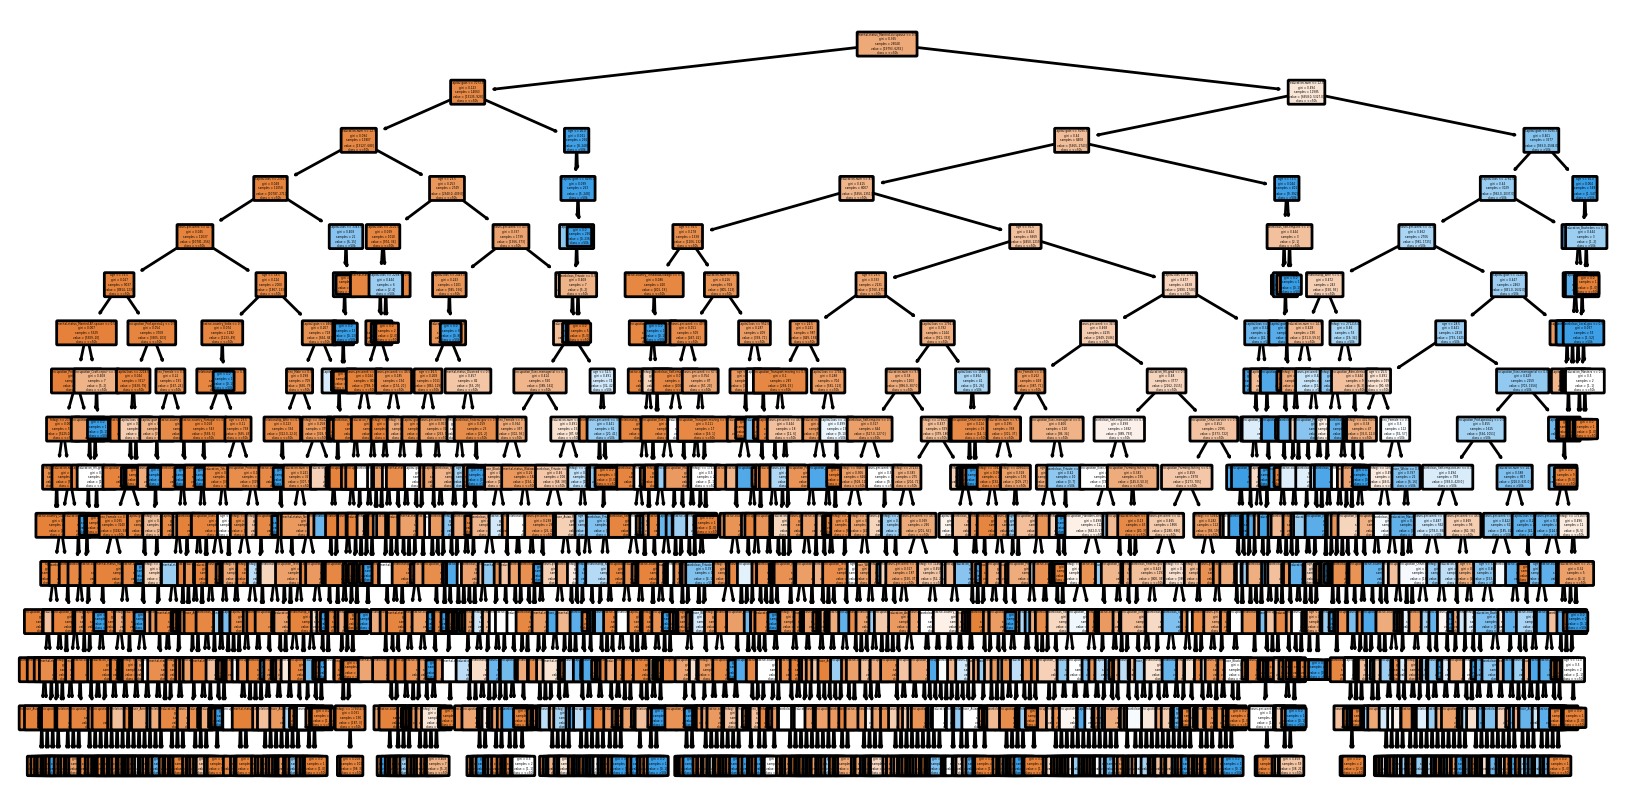

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=15, random_state=42)
clf.fit(X=X_train, y=(train.iloc[:,-1]=='>50K').astype(int))

plt.figure(figsize=(10,5), dpi=200)
plot_tree(clf, feature_names=X_train.columns.tolist(), 
          class_names=['<=50k','>50k'],
          filled=True, rounded=True)
plt.show()

## 1.1.1. _Regularization Tuning Parameters_ (or, technically, _stopping parameters_)

In [31]:
((train.income=='>50K')==clf.predict(X_train)).sum()/train.shape[0]

0.9046375921375921

In [32]:
((test.income=='>50K')==clf.predict(X_test)).sum()/test.shape[0]

0.8456932289267619

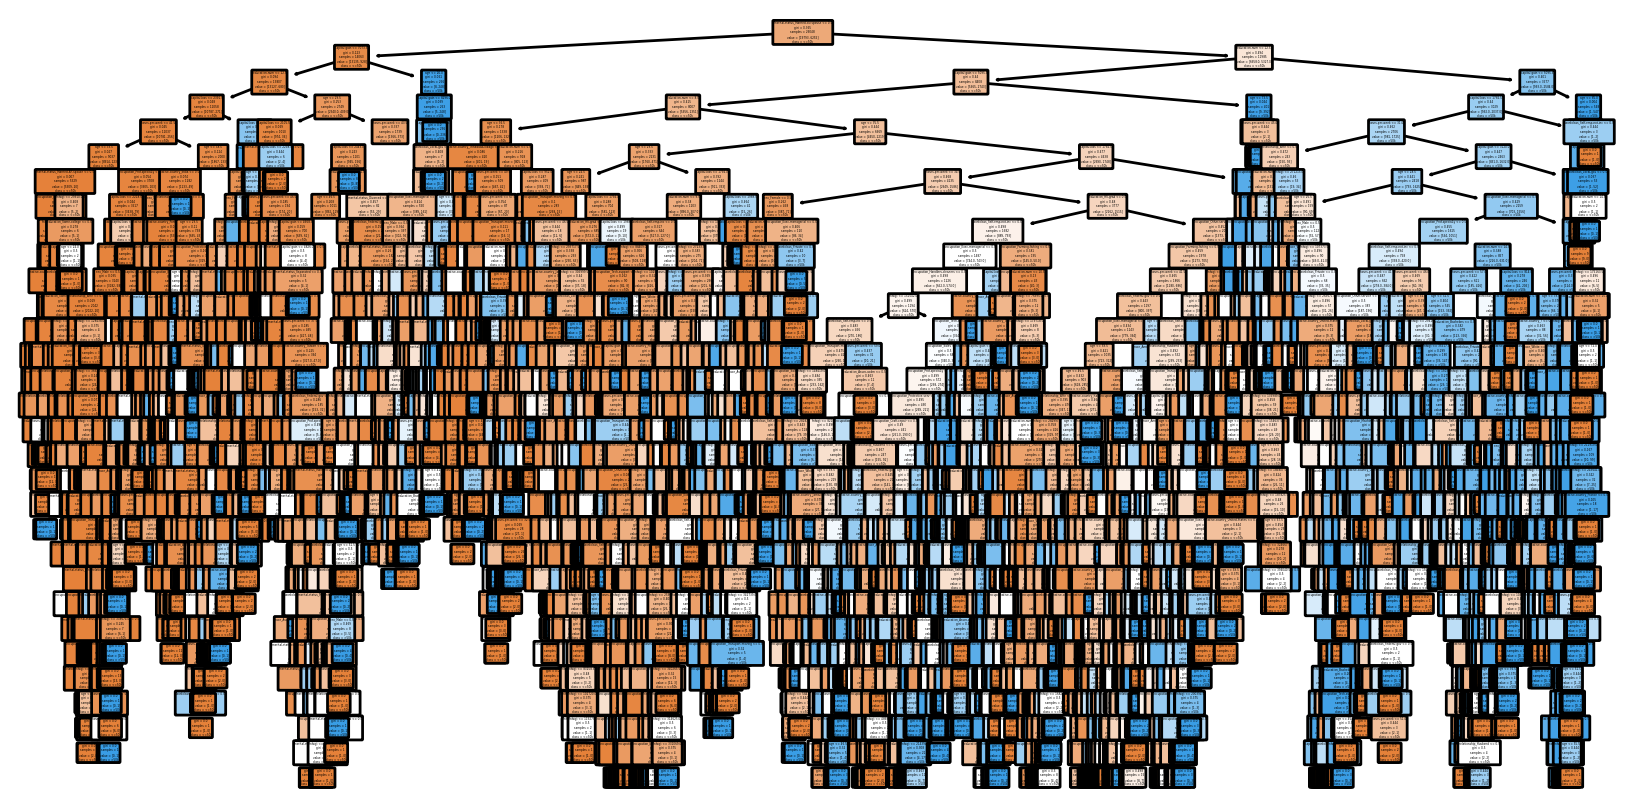

In [34]:
clf = DecisionTreeClassifier(max_depth=30, random_state=42)
clf.fit(X=X_train, y=(train.iloc[:,-1]=='>50K').astype(int))

plt.figure(figsize=(10,5), dpi=200)
plot_tree(clf, feature_names=X_train.columns.tolist(), 
          class_names=['<=50k','>50k'],
          filled=True, rounded=True)
plt.show()

In [35]:
((train.income=='>50K')==clf.predict(X_train)).sum()/train.shape[0]

0.9895193488943489

In [36]:
((test.income=='>50K')==clf.predict(X_test)).sum()/test.shape[0]

0.8205128205128205

In [38]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

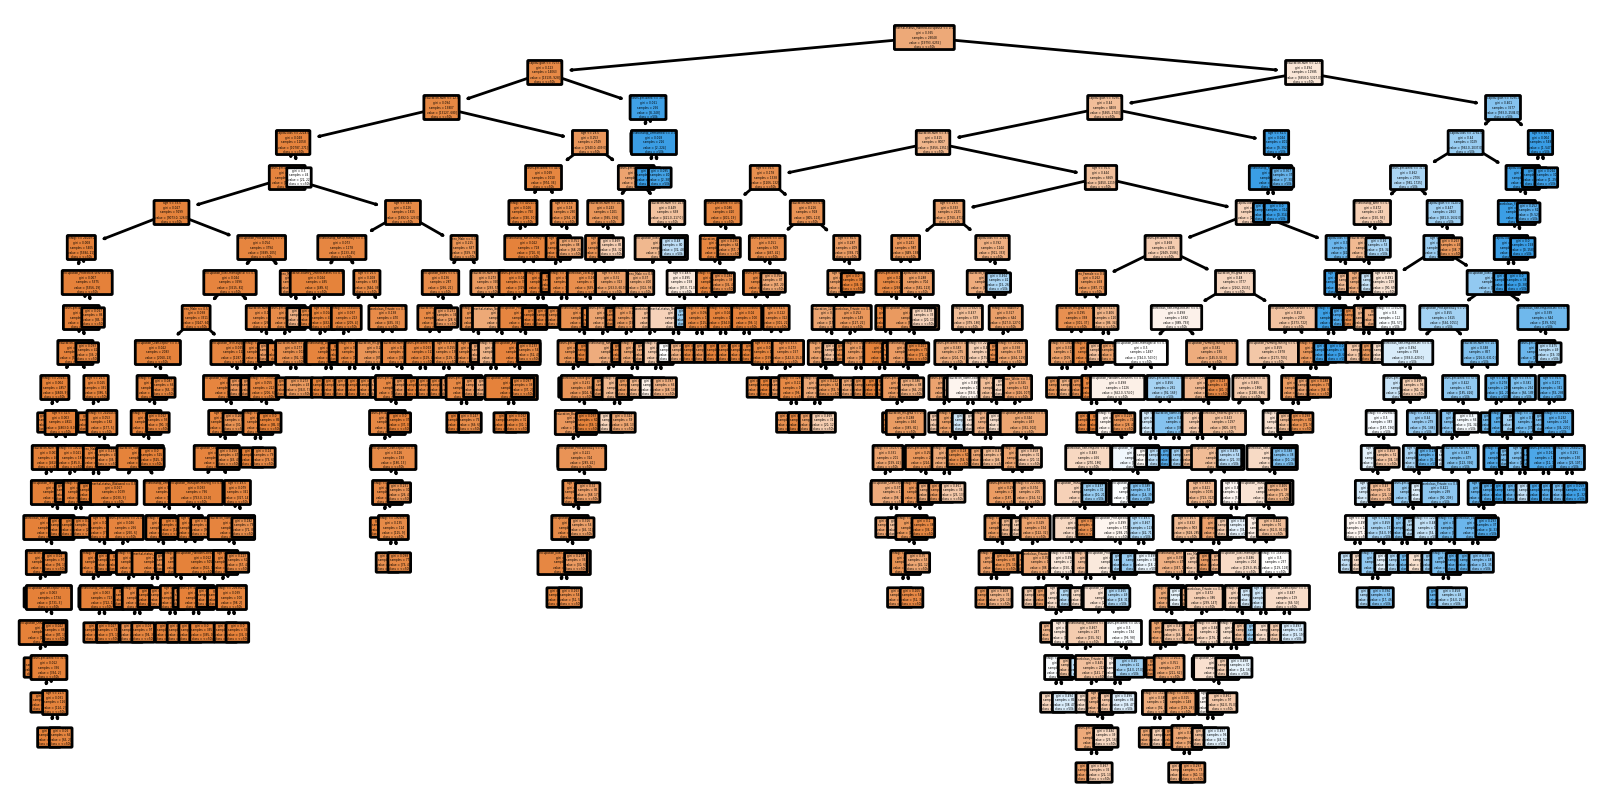

In [39]:
clf = DecisionTreeClassifier(max_depth=30, random_state=42, 
                             min_samples_leaf=30, 
                             min_samples_split=100)
clf.fit(X=X_train, y=(train.iloc[:,-1]=='>50K').astype(int))

plt.figure(figsize=(10,5), dpi=200)
plot_tree(clf, feature_names=X_train.columns.tolist(), 
          class_names=['<=50k','>50k'],
          filled=True, rounded=True)
plt.show()

In [40]:
((train.income=='>50K')==clf.predict(X_train)).sum()/train.shape[0]

0.8719671375921376

In [41]:
((test.income=='>50K')==clf.predict(X_test)).sum()/test.shape[0]

0.8506064793489944

## 1.1.2. Decison Tree Construction AKA _Model Fitting_


## 1.1.3. What are **Decison Trees**?

### 1.1.3.1. Interactions

![](https://www.researchgate.net/publication/280032275/figure/fig6/AS:340436318212124@1458177751589/An-example-population-decision-tree-and-a-personalized-decision-path-Panel-a-gives-the.png)

### 1.1.3.2. Feature Space _partitions_

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528907338/regression-tree_g8zxq5.png)

### 1.1.3.3. Feature Importance

### 1.1.3.4. Partial Dependency Plots


In [42]:
#https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [43]:
import plotly.express as px

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns.tolist(),
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index()

fig = px.bar(feature_importance_df[:20], y='Feature', x='Importance', 
             title='Feature Importance')
fig.show()

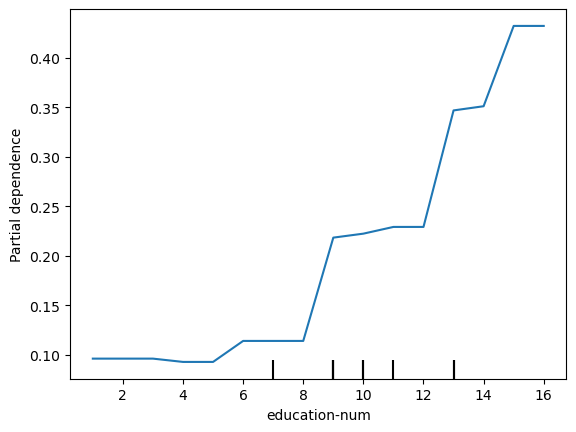

In [44]:
from sklearn.inspection import PartialDependenceDisplay

# X_train.columns=='education-num' # 2
_ = PartialDependenceDisplay.from_estimator(clf, X_train, (2,))


## 1.2. **Random Forests** (of **Bootstrapped Decision Trees**)


In [45]:
RandomForestClassifier?

Object `RandomForestClassifier` not found.


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Fit 1000 Decision Trees with unlimited depth
rfc = RandomForestClassifier(n_estimators=1000, random_state=1,
                             min_samples_leaf=10, min_samples_split=30)
rfc.fit(X=X_train, y=(train.iloc[:,-1]=='>50K').astype(int))

RandomForestClassifier(min_samples_leaf=10, min_samples_split=30,
                       n_estimators=1000, random_state=1)

In [47]:
((train.income=='>50K')==rfc.predict(X_train)).sum()/train.shape[0]

0.8691262285012284

In [48]:
((test.income=='>50K')==rfc.predict(X_test)).sum()/test.shape[0]

0.855980346998311

In [49]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns.tolist(),
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index()

fig = px.bar(feature_importance_df[:60], y='Feature', x='Importance', 
             title='Feature Importance',
              width=800, height=1200)
fig.show()

In [ ]:
_ = PartialDependenceDisplay.from_estimator(rfc, X_train, (2,))


In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((train.income=='>50K'), clf.predict(X_train)==1.0, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((train.income=='>50K'), rfc.predict(X_train)==1.0, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), clf.predict(X_test)==1.0, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), rfc.predict(X_test)==1.0, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), rfc.predict_proba(X_test)[:,1]>0.5, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

## 2. _Prediction_, _thresholding_, and different _Metrics_

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), rfc.predict_proba(X_test)[:,1]>0.8, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()

In [ ]:
cm_disp = ConfusionMatrixDisplay(
    confusion_matrix((test.income=='>50K'), rfc.predict_proba(X_test)[:,1]>0.2, 
    labels=[False, True]), display_labels=['<=50K','>50K'])
_ = cm_disp.plot()